In [5]:
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBRFClassifier, XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# 경고 지우기
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 700)
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=Warning)

In [7]:
# 데이터 불러오기
pd.set_option('display.max_columns', None)
df_ = pd.read_csv(r'./Telecom_Customer_Churn_Complete.csv')
df = df_.copy()
df.head()

,Unnamed: 0,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,LoyaltyID,Tenure,Churn,Age,Under 30,Married,Number of Dependents,Location ID,ID,Population,Service ID,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Internet Type,Avg Monthly GB Download,Device Protection Plan,Premium Tech Support,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Status ID,Satisfaction Score,Customer Status,Churn Category
0,0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,326527,2,Yes,37,No,No,0,PZZUIT6837,3,"58,198",ZLZTZWPWE3351,Q3,No,0,2,NaN,10.47,DSL,21,No,No,No,Yes,53.85,0.0,0,20.94,129.09,SUDNGT6444,1,Churned,Competitor
1,1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved,503388,2,Yes,19,Yes,No,2,CKNALR2542,5,"43,019",GXJVSQIYH4715,Q3,No,0,2,NaN,9.12,Fiber Optic,51,No,No,No,Yes,70.70,0.0,0,18.24,169.89,KZSZDV8891,2,Churned,Other
2,2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved,160192,8,Yes,31,No,No,2,VCQKYE1638,6,"62,784",KDUHHRQBI5663,Q3,No,0,8,NaN,12.15,Cable,26,Yes,No,Yes,Yes,99.65,0.0,0,97.20,917.70,EPTIUU1269,3,Churned,Other
3,3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved,582674,28,Yes,23,Yes,Yes,3,SNLISG8671,9,"1,957",WXXQTNEZW3786,Q3,No,0,28,Offer C,4.89,Fiber Optic,47,Yes,Yes,Yes,Yes,104.80,0.0,0,136.92,3182.97,PAJIVH8196,3,Churned,Other
4,4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices,933642,49,Yes,38,No,No,1,YTSGZA8582,14,"15,140",LTNFDWAMC2575,Q3,No,0,49,NaN,44.33,Fiber Optic,11,Yes,No,Yes,Yes,103.70,0.0,0,2172.17,7208.47,RXFOMV1173,1,Churned,Competitor


In [8]:
# 데이터 정보 확인
def show_info(df):
    print("***** Check NA *****")
    print(df.isnull().sum())
    print(" ")
    print("***** Duplicated *****")
    print(df.duplicated().sum())
    print(" ")
    print("***** NUNIQUE *****")
    print(df.nunique())
    print(" ")
    print("***** INFO *****")
    print(df.info())
    print(" ")
    print("***** COLUMNS *****")
    print(df.columns)
    print(" ")
    print("***** DESCRIPTIVE STATISTICS *****")
    print(df.describe().T)

pd.set_option('display.max_rows', None)
print(show_info(df))
print(len(df.columns))

***** Check NA *****
Unnamed: 0                              0
Customer ID                             0
Count                                   0
Country                                 0
State                                   0
City                                    0
Zip Code                                0
Lat Long                                0
Latitude                                0
Longitude                               0
Gender                                  0
Senior Citizen                          0
Partner                                 0
Dependents                              0
Tenure Months                           0
Phone Service                           0
Multiple Lines                          0
Internet Service                        0
Online Security                         0
Online Backup                           0
Device Protection                       0
Tech Support                            0
Streaming TV                            0
Streaming Mov

In [9]:
# 관련 없는 컬럼 제거
a = ['Unnamed: 0', 'Senior Citizen', 'Partner', 'Tenure', 'Tenure in Months', 'Dependents', 'City', 'Customer ID', 'Device Protection Plan', 'Count',
     'Monthly Charges', 'Country', 'State', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Score',
     'Churn Reason', 'LoyaltyID', 'Churn', 'Location ID','ID','Under 30', 'Population', 'Service ID', 'Quarter', 'Internet Type', 'Number of Referrals', 'Avg Monthly Long Distance Charges',
     'Status ID', 'Premium Tech Support', 'Customer Status', 'Churn Category']

cols = a
for col in cols:
  df = df.drop([f'{col}'], axis=1)

In [10]:
# 결측치가 있는 열만 출력
missing_cols = df.isna().sum()
missing_cols = missing_cols[missing_cols > 0]  # 결측치가 있는 컬럼 필터링

print("결측치가 있는 컬럼:")
print(missing_cols)


결측치가 있는 컬럼:
Offer    3877
dtype: int64


In [11]:
# 결측치 제거
# Offer와 Internet Type는 결측치가 아니라 None 옵션값이라 Na를 None으로 대체한다.
df['Offer'] = df['Offer'].fillna('None')

<Axes: >

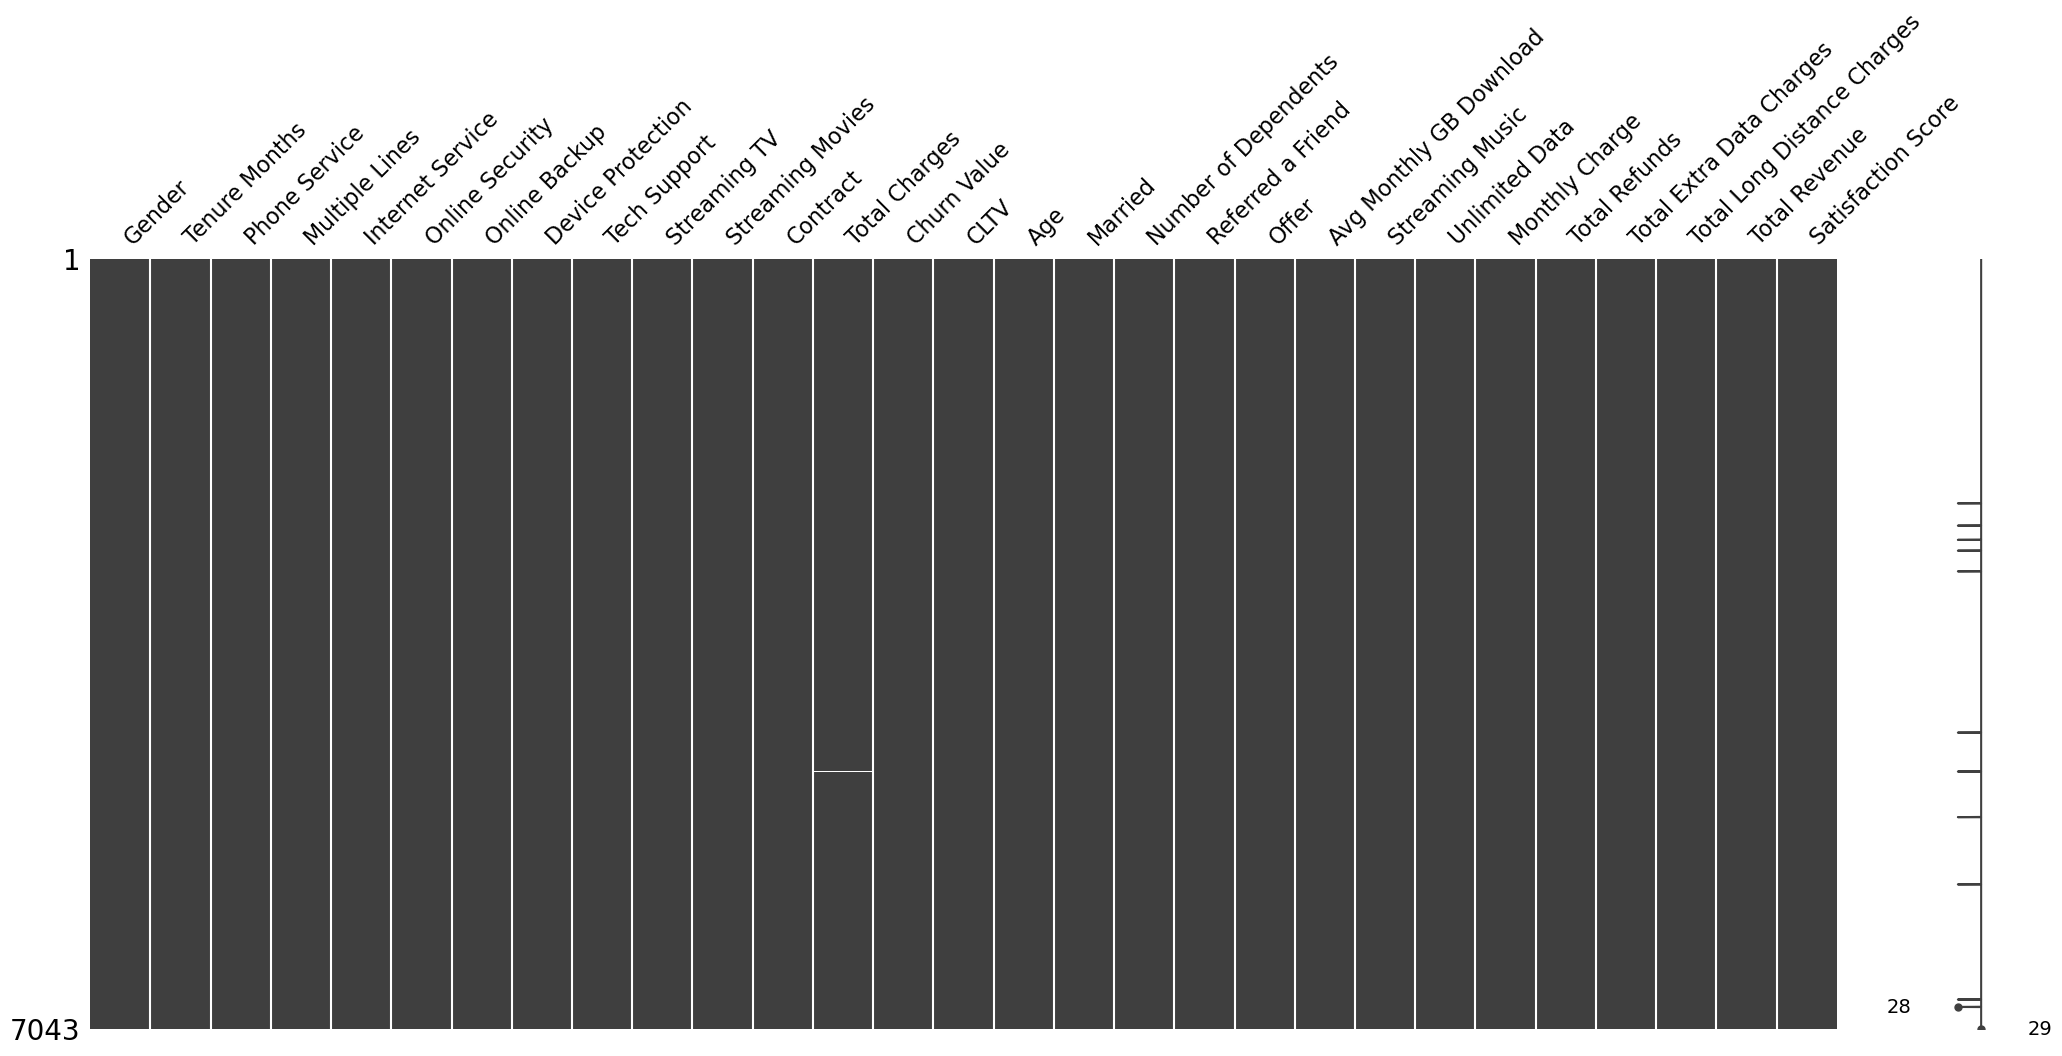

In [12]:
# Total Charges의 데이터 타입이 object라서 float으로 변경하려고 했으나 진행되지 않아서 ' '가 있다는 것을 확인. 열의 빈칸 ' '을 np.nan로 변환하기
df = df.replace(' ', np.nan)
msno.matrix(df)

In [13]:
# 빈칸이 있는 행을 제거하기. 11개라 그냥 제거
df = df.dropna()
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [14]:
# 데이터를 인코딩하는 함수 선언

def encode_data(data):
    #Tenure Months 열 인코딩
    data['Tenure Months'] = pd.cut(data['Tenure Months'], bins=3, labels=['Basic', 'Standard', 'Premium'])
    data['Tenure Months'] = data['Tenure Months'].replace({'Basic': 0, 'Standard': 1, 'Premium': 2}).astype(int)

    # Total Long Distance Charges 열 인코딩
    data['Total Long Distance Charges'] = pd.cut(data['Total Long Distance Charges'], bins=3, labels=['Low', 'Mediume', 'High'])
    data['Total Long Distance Charges'] = data['Total Long Distance Charges'].replace({'Low': 0, 'Mediume': 1, 'High': 2}).astype(int)

    # CLTV 열 인코딩
    data['CLTV'] = pd.cut(data['CLTV'], bins=3, labels=['Low', 'Mediume', 'High'])
    data['CLTV'] = data['CLTV'].replace({'Low': 0, 'Mediume': 1, 'High': 2}).astype(int)

    # Age 1~17:0, 18~44:1, 45~64:2, 65~:3
    bins_age = [-1, 17, 44, 64, 200]  # 구간 설정
    labels_age = [0, 1, 2, 3]  # 인코딩할 값

    data['Age'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age)
    data['Age'] = data['Age'].astype(int)

    # Number of Dependents
    bins_dep = [-1, 1, 2, 200]   # 구간 설정
    labels_dep = [0, 1, 2]  # 인코딩할 값

    data['Number of Dependents'] = pd.cut(data['Number of Dependents'], bins=bins_dep, labels=labels_dep)
    data['Number of Dependents'] = data['Number of Dependents'].astype(int)

    # Avg Monthly GB Download 열 인코딩
    data['Avg Monthly GB Download'] = pd.cut(data['Avg Monthly GB Download'], bins=3, labels=['Low', 'Mediume', 'High'])
    data['Avg Monthly GB Download'] = data['Avg Monthly GB Download'].replace({'Low': 0, 'Mediume': 1, 'High': 2}).astype(int)

    # Monthly Charge 열 인코딩
    data['Monthly Charge'] = pd.cut(data['Monthly Charge'], bins=3, labels=['Low', 'Mediume', 'High'])
    data['Monthly Charge'] = data['Monthly Charge'].replace({'Low': 0, 'Mediume': 1, 'High': 2}).astype(int)

    # Total Refunds 열 인코딩
    data['Total Refunds'] = pd.cut(data['Total Refunds'], bins=3, labels=['Low', 'Mediume', 'High'])
    data['Total Refunds'] = data['Total Refunds'].replace({'Low': 0, 'Mediume': 1, 'High': 2}).astype(int)

    # Total Extra Data Charges 열 인코딩
    data['Total Extra Data Charges'] = pd.cut(data['Total Extra Data Charges'], bins=3, labels=['Low', 'Mediume', 'High'])
    data['Total Extra Data Charges'] = data['Total Extra Data Charges'].replace({'Low': 0, 'Mediume': 1, 'High': 2}).astype(int)

    # Total Revenue 열 인코딩
    data['Total Revenue'] = pd.cut(data['Total Revenue'], bins=3, labels=['Low', 'Mediume', 'High'])
    data['Total Revenue'] = data['Total Revenue'].replace({'Low': 0, 'Mediume': 1, 'High': 2}).astype(int)

    # Total Charges 열 인코딩
    data['Total Charges'] = data['Total Charges'].astype(float)
    data['Total Charges'] = pd.cut(data['Total Charges'], bins=2, labels=['Low', 'High'])
    data['Total Charges'] = data['Total Charges'].replace({'Low': 0, 'High': 1}).astype(int)

    label_encoder = LabelEncoder()

    for col in data.select_dtypes(include='object').columns:
      data[col] = label_encoder.fit_transform(data[col])


    return data

df2 = encode_data(df)
df2.head(10)

,Gender,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Total Charges,Churn Value,CLTV,Age,Married,Number of Dependents,Referred a Friend,Offer,Avg Monthly GB Download,Streaming Music,Unlimited Data,Monthly Charge,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score
0,1,0,1,0,0,2,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,2
2,0,0,1,2,1,0,0,2,0,2,2,0,0,1,2,1,0,1,0,0,0,1,1,2,0,0,0,0,3
3,0,1,1,2,1,0,0,2,2,2,2,0,0,1,2,1,1,2,0,3,1,1,1,2,0,0,0,0,3
4,1,2,1,2,1,0,2,2,0,2,2,0,1,1,2,1,0,0,0,0,0,1,1,2,0,0,1,1,1
5,0,0,1,0,0,0,0,2,2,0,0,0,0,1,2,1,1,0,1,0,2,0,1,1,0,0,0,0,1
6,1,0,0,1,0,0,0,2,0,0,2,0,0,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,3
7,1,0,1,0,2,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1,1,1,2,1,0,2,0,0,2,2,0,1,1,2,2,1,0,1,0,0,1,1,2,0,0,1,1,1
9,1,0,0,1,0,0,2,0,0,0,0,0,0,1,0,1,1,0,1,0,2,0,1,0,0,0,0,0,1


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Gender                       7032 non-null   int32
 1   Tenure Months                7032 non-null   int32
 2   Phone Service                7032 non-null   int32
 3   Multiple Lines               7032 non-null   int32
 4   Internet Service             7032 non-null   int32
 5   Online Security              7032 non-null   int32
 6   Online Backup                7032 non-null   int32
 7   Device Protection            7032 non-null   int32
 8   Tech Support                 7032 non-null   int32
 9   Streaming TV                 7032 non-null   int32
 10  Streaming Movies             7032 non-null   int32
 11  Contract                     7032 non-null   int32
 12  Total Charges                7032 non-null   int32
 13  Churn Value                  7032 non-null   int64
 1

In [16]:
df2['Tenure Months'].unique()

array([0, 1, 2])

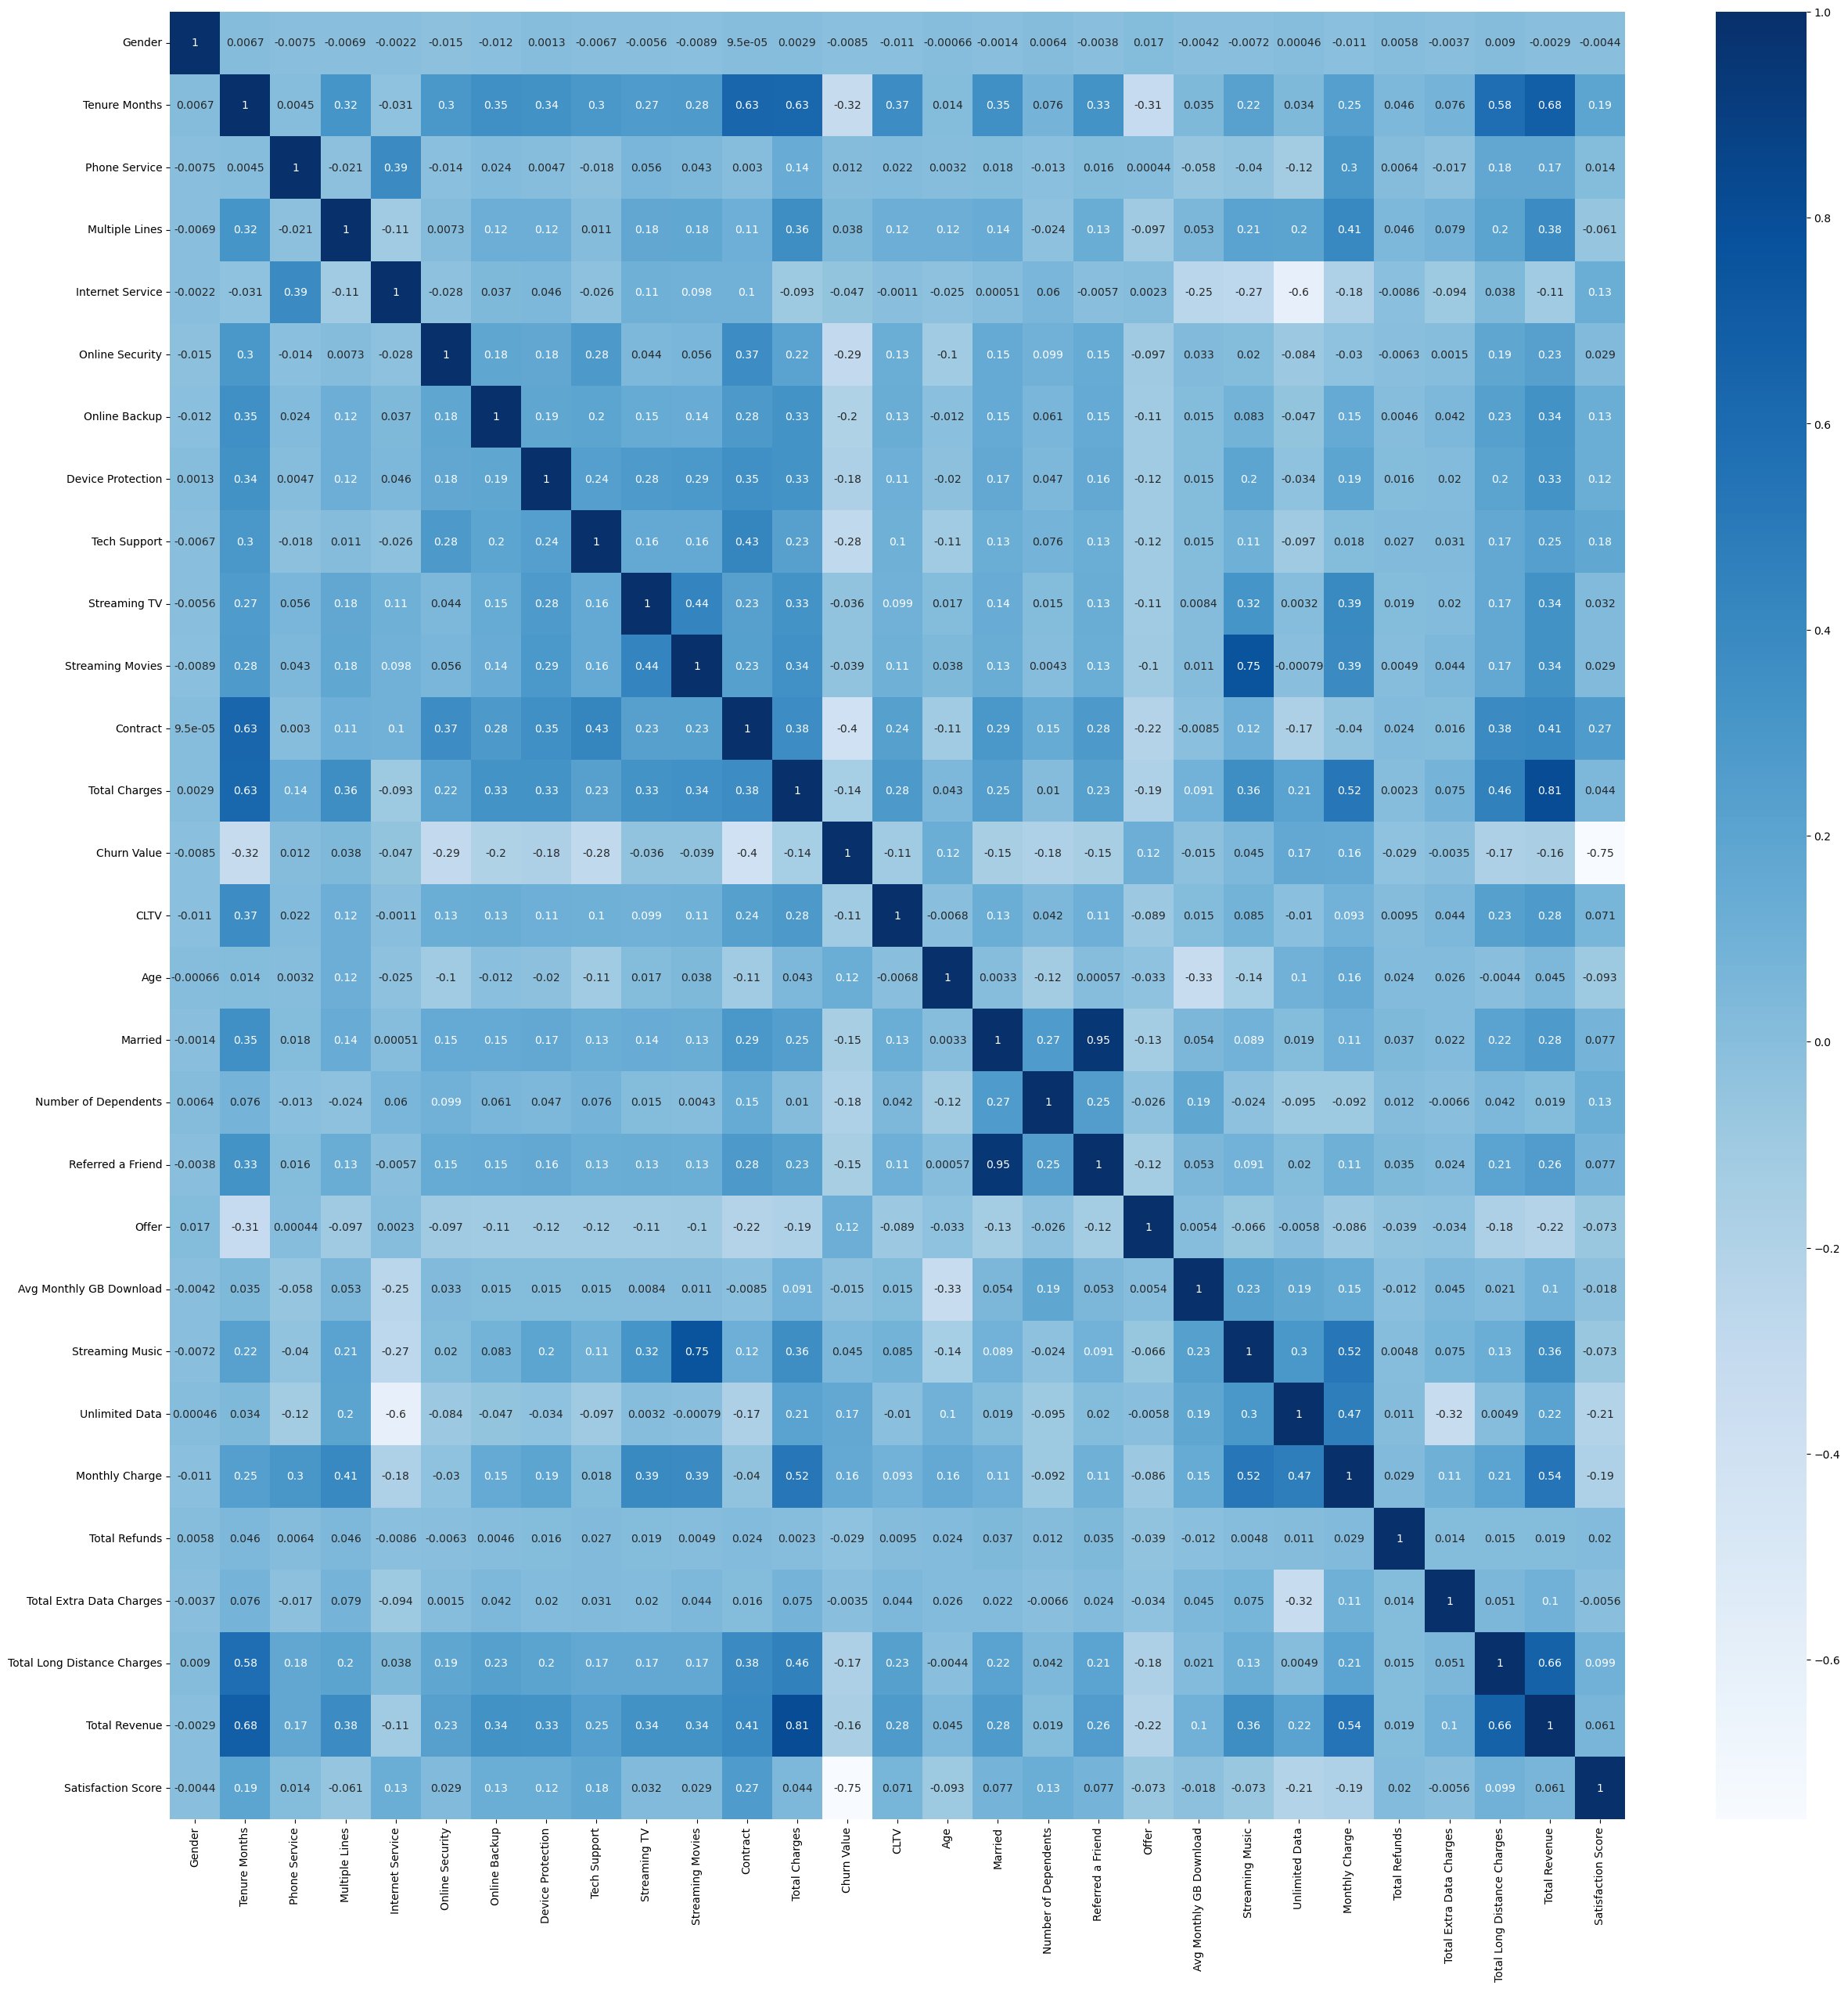

In [17]:
# 상관관계를 확인한다.
plt.figure(figsize=(30, 30))
sns.heatmap(df2.corr(), annot=True, cmap='Blues')
plt.show()

**************************************************
LOG
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1260
           1       0.93      0.88      0.90       498

    accuracy                           0.95      1758
   macro avg       0.94      0.93      0.93      1758
weighted avg       0.95      0.95      0.95      1758




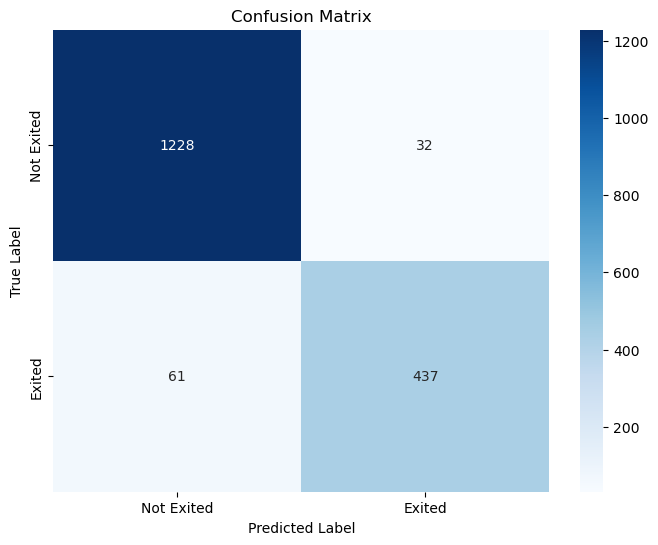

**************************************************
KNN
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1260
           1       0.86      0.82      0.84       498

    accuracy                           0.91      1758
   macro avg       0.90      0.88      0.89      1758
weighted avg       0.91      0.91      0.91      1758




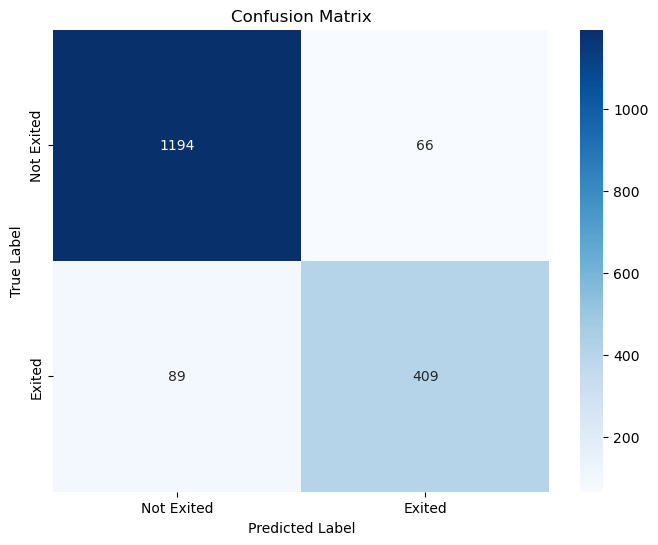

**************************************************
CART
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1260
           1       0.86      0.91      0.88       498

    accuracy                           0.93      1758
   macro avg       0.91      0.92      0.92      1758
weighted avg       0.93      0.93      0.93      1758




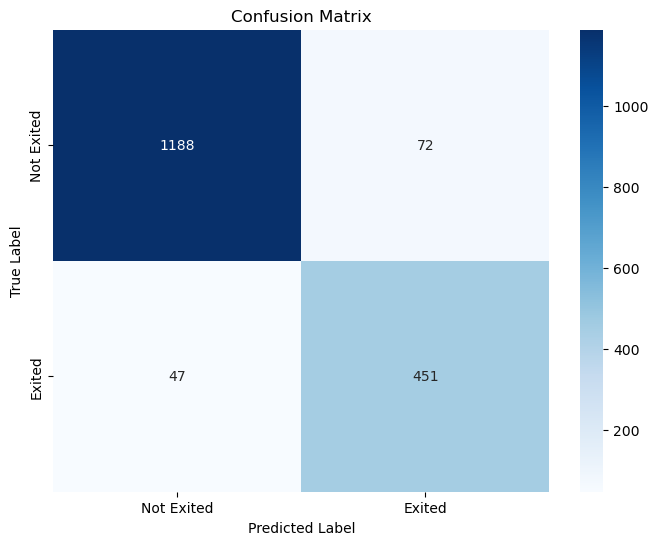

**************************************************
RF
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1260
           1       0.95      0.87      0.91       498

    accuracy                           0.95      1758
   macro avg       0.95      0.93      0.94      1758
weighted avg       0.95      0.95      0.95      1758




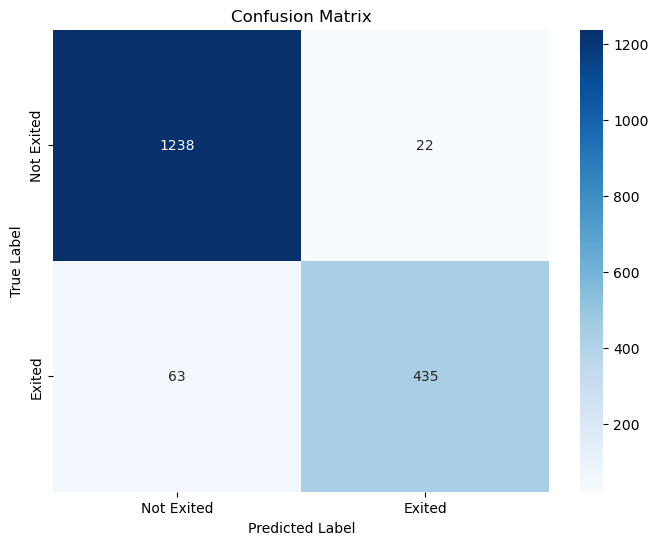

**************************************************
AdaBoost
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1260
           1       0.92      0.91      0.91       498

    accuracy                           0.95      1758
   macro avg       0.94      0.94      0.94      1758
weighted avg       0.95      0.95      0.95      1758




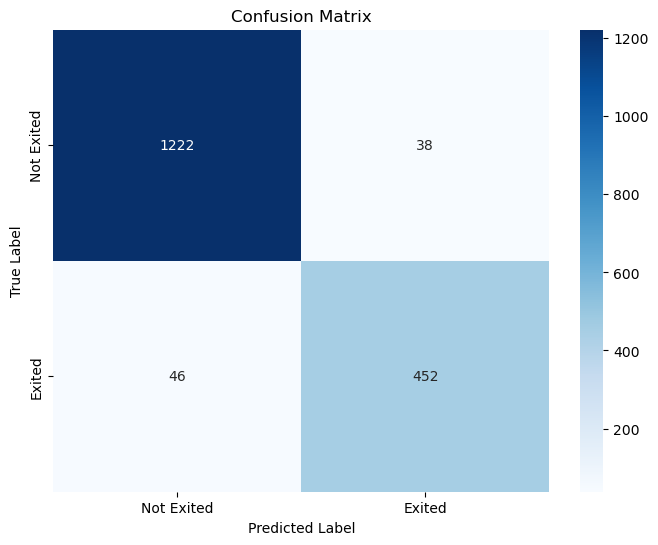

**************************************************
GBM
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1260
           1       0.94      0.88      0.91       498

    accuracy                           0.95      1758
   macro avg       0.95      0.93      0.94      1758
weighted avg       0.95      0.95      0.95      1758




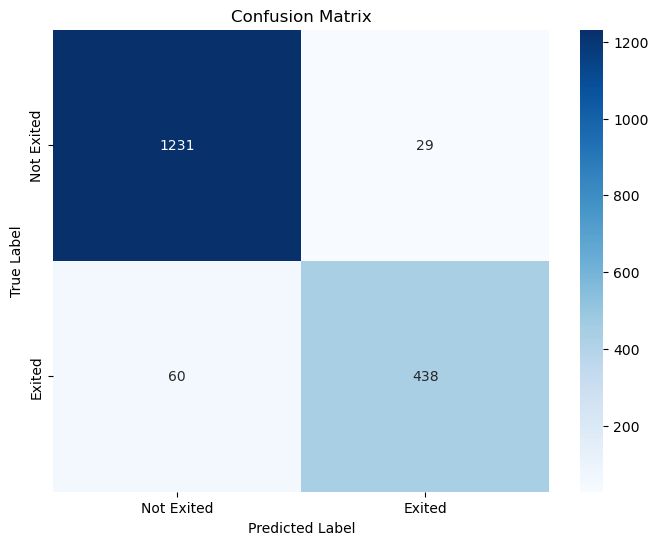

**************************************************
XGBoost
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.94      0.89      0.92       498

    accuracy                           0.95      1758
   macro avg       0.95      0.94      0.94      1758
weighted avg       0.95      0.95      0.95      1758




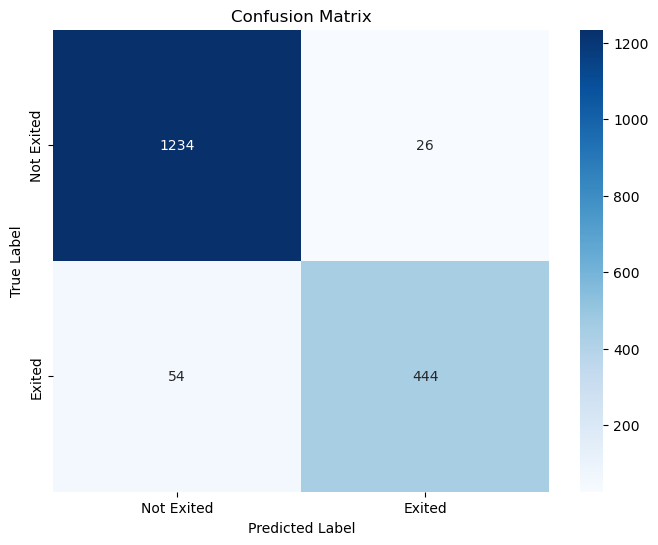

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 398, number of negative: 1008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 1406, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.283073 -> initscore=-0.929271
[LightGBM] [Info] Start training from score -0.929271
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

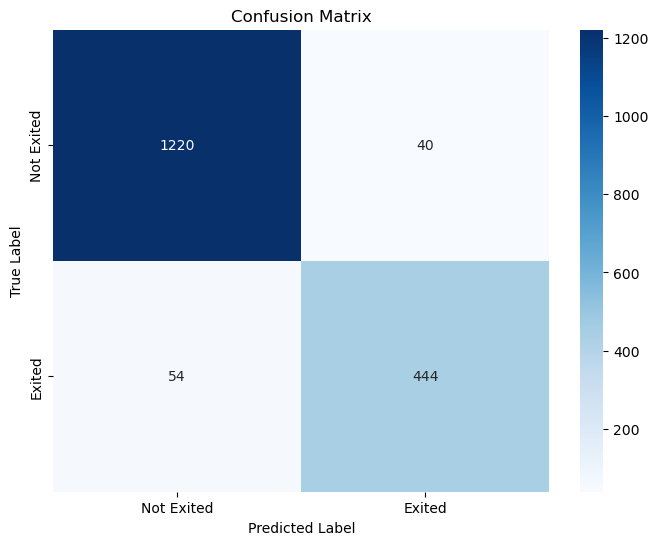

In [18]:
# 모델 선정, 학습 및 평가 진행.

df = df2.copy()
X = df.drop(["Churn Value"], axis=1)
y = df["Churn Value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = [('LOG', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ("AdaBoost", AdaBoostClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBRFClassifier(objective='reg:squarederror')),
          ("LightGBM", LGBMClassifier())]

f1_score_list = []

for name, clf in models:
    acc = cross_val_predict(clf, X_test, y_test, cv=5)
    print('*'*50)
    print(name)
    print(classification_report(y_test,acc))
    print()

    # Confusion matrix 만들기
    cm = confusion_matrix(y_test, acc)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Exited', 'Exited'],
                yticklabels=['Not Exited', 'Exited'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.95      0.90      0.92       498

    accuracy                           0.96      1758
   macro avg       0.95      0.94      0.95      1758
weighted avg       0.96      0.96      0.96      1758



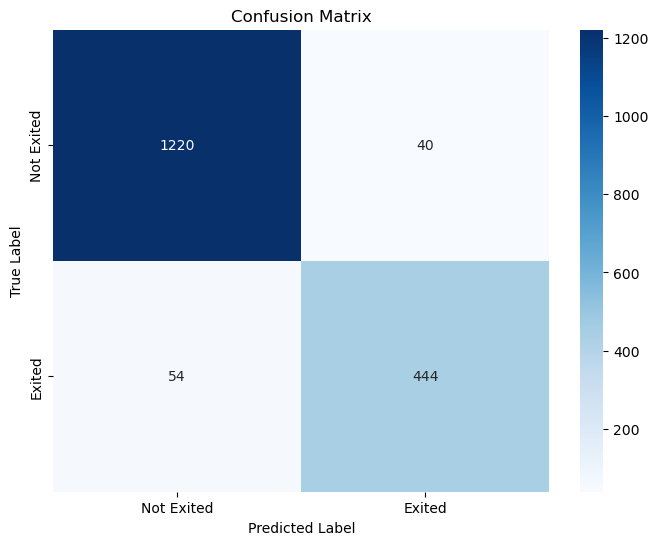

In [19]:
# 스태킹
base_models = [
    ('xgb', XGBRFClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, colsample_bytree = 0.7, gamma = 0, learning_rate = 1, max_depth = 19, n_estimators = 200)),  # Adjusted parameters for XGBClassifier
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
]

meta_model = LogisticRegression(max_iter=10000)

clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

clf.fit(X_train, y_train)

scores = cross_val_predict(clf, X_test, y_test, cv=5)
print(classification_report(y_test, scores))

# Confusion matrix 만들기
cm = confusion_matrix(y_test, acc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.95      0.89      0.92       498

    accuracy                           0.96      1758
   macro avg       0.95      0.94      0.94      1758
weighted avg       0.96      0.96      0.96      1758



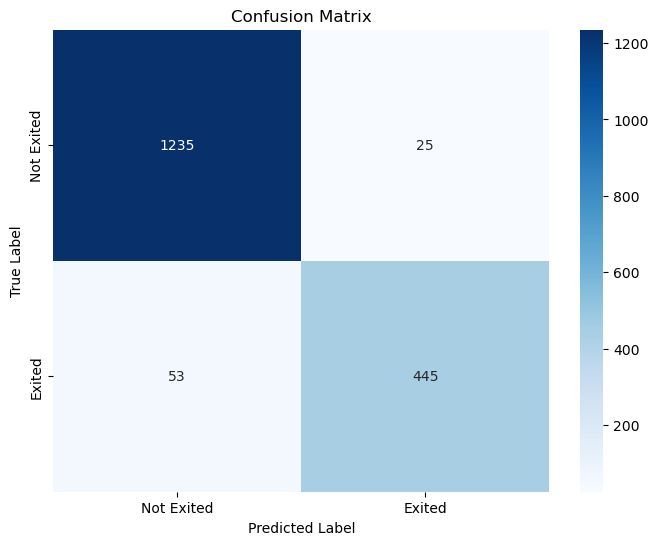

In [17]:
# soft voting
base_models = [
    ('lr', LogisticRegression(random_state=42, max_iter=10000)),  # Increased max_iter
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('xgb', XGBRFClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, colsample_bytree = 0.7, gamma = 0, learning_rate = 1, max_depth = 19, n_estimators = 200)),  # Adjusted parameters for XGBClassifier
    ("XGBoost", XGBClassifier(objective='reg:squarederror')), # objective='binary:logistic
]
clf = VotingClassifier(estimators=base_models, voting='soft', n_jobs=-1)

clf.fit(X_train, y_train)

scores = cross_val_predict(clf, X_test, y_test, cv=5)
print(classification_report(y_test, scores))

# Confusion matrix
cm = confusion_matrix(y_test, scores)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.95      0.89      0.92       498

    accuracy                           0.95      1758
   macro avg       0.95      0.93      0.94      1758
weighted avg       0.95      0.95      0.95      1758



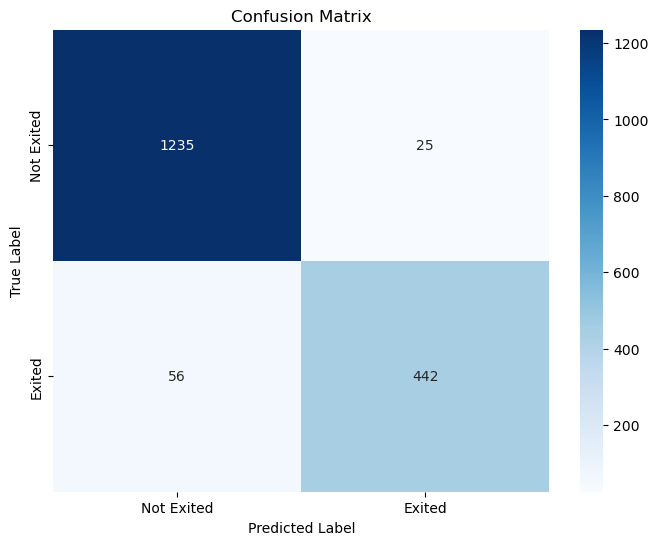

In [20]:
# hard voting
base_models = [
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('xgb', XGBRFClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, colsample_bytree = 0.7, gamma = 0, learning_rate = 1, max_depth = 19, n_estimators = 200)),  # Adjusted parameters for XGBClassifier
    ("XGBoost", XGBClassifier(objective='reg:squarederror')), # objective='binary:logistic
]
clf = VotingClassifier(estimators=base_models, voting='hard', n_jobs=-1)

clf.fit(X_train, y_train)

scores = cross_val_predict(clf, X_test, y_test, cv=5)
print(classification_report(y_test, scores))

# Confusion matrix
cm = confusion_matrix(y_test, scores)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# AutoGluon - AutoML
from autogluon.tabular import TabularDataset, TabularPredictor
ag_train = X_train.copy()
ag_train['Churn'] = y_train
ag_test = X_test
ag_test['Churn'] = y_test

train_data = TabularDataset(ag_train)

time_limit = 3600*6
predictor = TabularPredictor(label='Churn',eval_metric='f1_macro').fit(train_data=train_data,presets='best_quality',num_stack_levels=3,time_limit=time_limit,num_gpus=0)

leaderboard = predictor.leaderboard(ag_test)
print(leaderboard)

predictions = predictor.predict(ag_test)

print(classification_report(y_test,predictions))

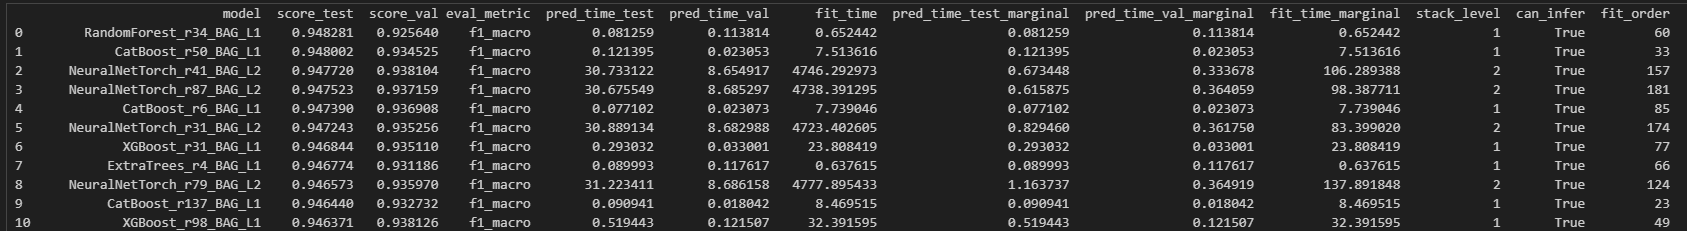
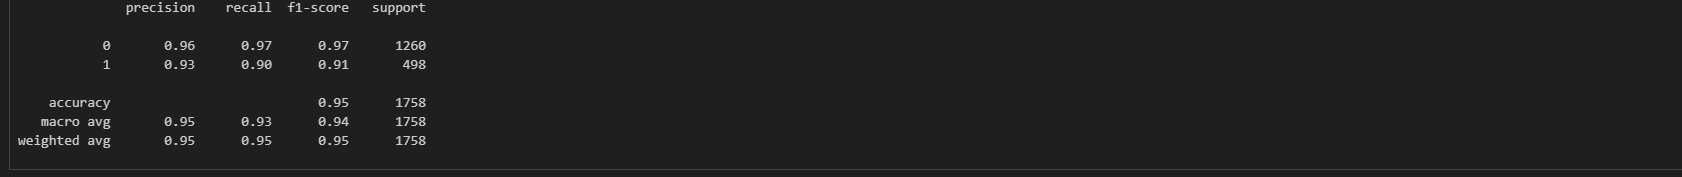

Training LOG...
Classification Report for LOG:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1260
           1       0.93      0.90      0.91       498

    accuracy                           0.95      1758
   macro avg       0.95      0.94      0.94      1758
weighted avg       0.95      0.95      0.95      1758



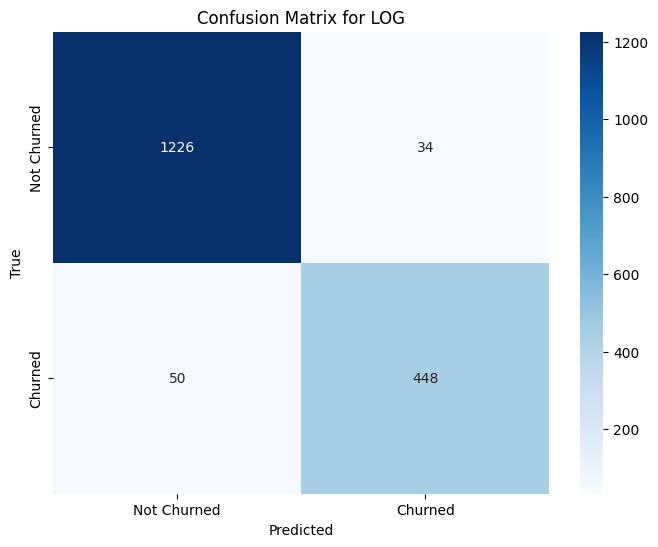

Training KNN...
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1260
           1       0.91      0.84      0.88       498

    accuracy                           0.93      1758
   macro avg       0.93      0.91      0.92      1758
weighted avg       0.93      0.93      0.93      1758



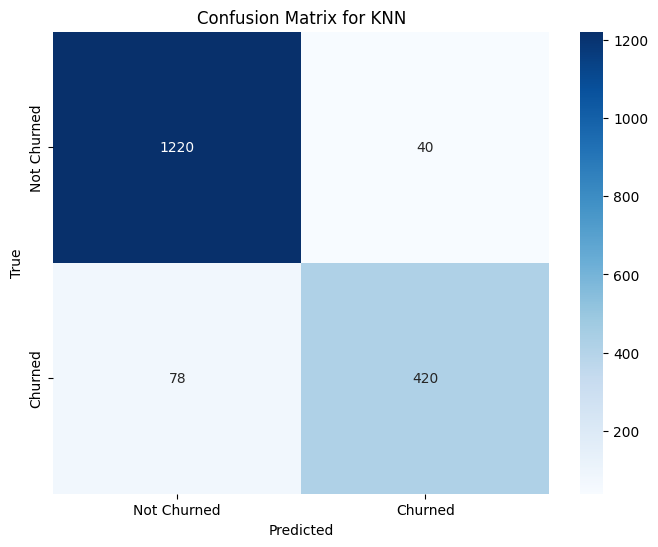

Training CART...
Classification Report for CART:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.94      0.91      0.92       498

    accuracy                           0.96      1758
   macro avg       0.95      0.94      0.95      1758
weighted avg       0.96      0.96      0.96      1758



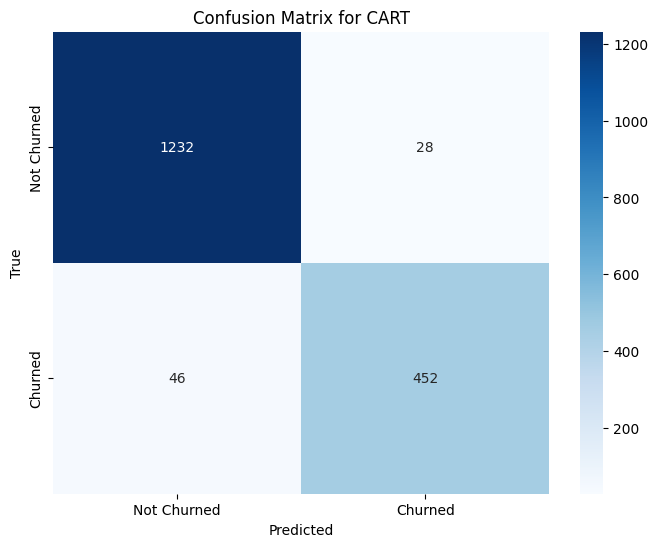

Training RF...
Classification Report for RF:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.95      0.89      0.92       498

    accuracy                           0.96      1758
   macro avg       0.95      0.93      0.94      1758
weighted avg       0.95      0.96      0.95      1758



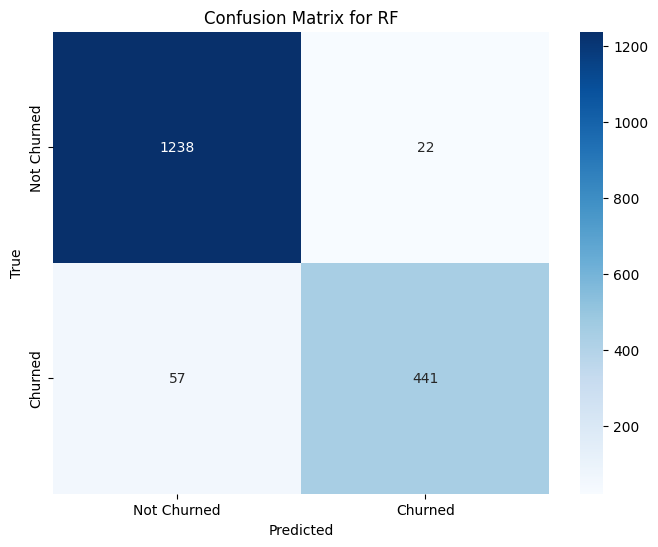

Training AdaBoost...
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.94      0.90      0.92       498

    accuracy                           0.96      1758
   macro avg       0.95      0.94      0.95      1758
weighted avg       0.96      0.96      0.96      1758



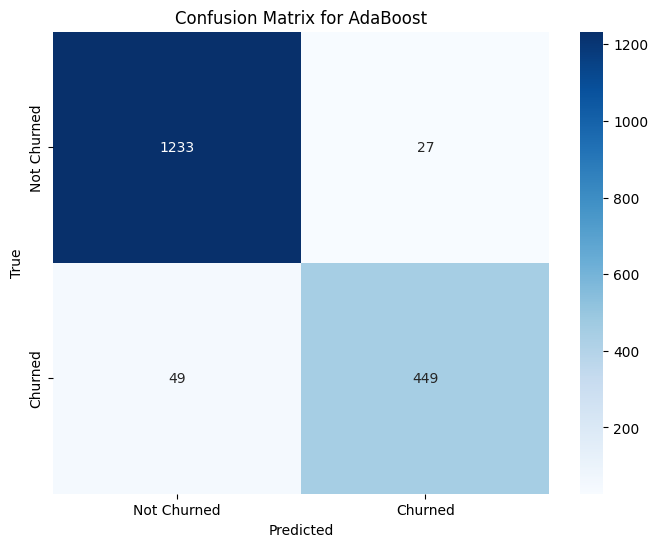

Training GBM...
Classification Report for GBM:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.96      0.90      0.93       498

    accuracy                           0.96      1758
   macro avg       0.96      0.94      0.95      1758
weighted avg       0.96      0.96      0.96      1758



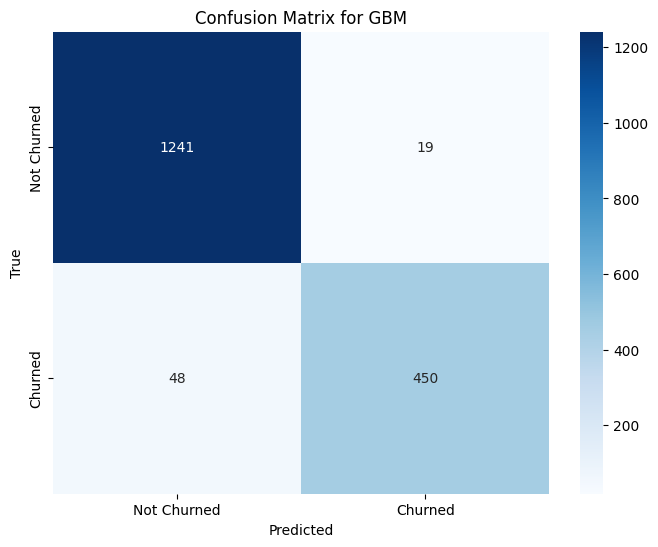

Training XGBoost...
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1260
           1       0.96      0.87      0.91       498

    accuracy                           0.95      1758
   macro avg       0.96      0.93      0.94      1758
weighted avg       0.95      0.95      0.95      1758



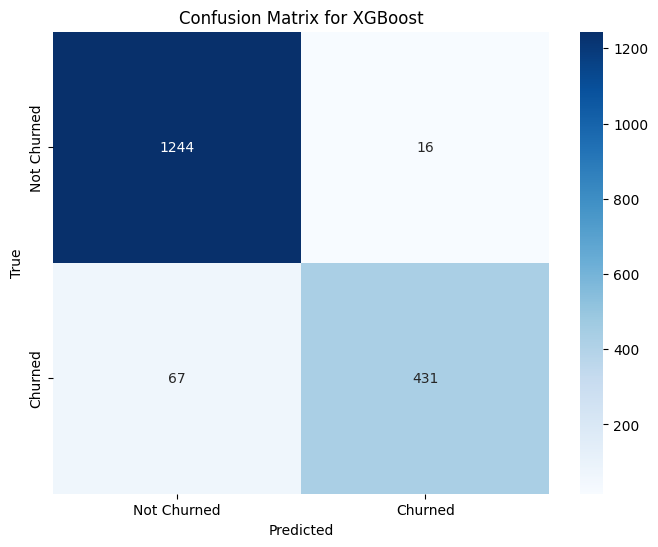

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1371, number of negative: 3903
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259954 -> initscore=-1.046205
[LightGBM] [Info] Start training from score -1.046205
Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.95      0.89      0.92       498

    accuracy                           0.95      1758
   macro avg       0.95      0.93      0.94      1758
weighted avg       0.95      0.95     

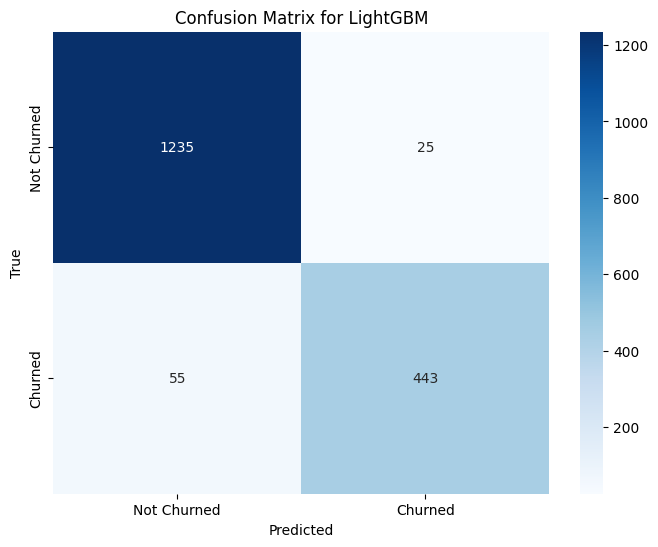

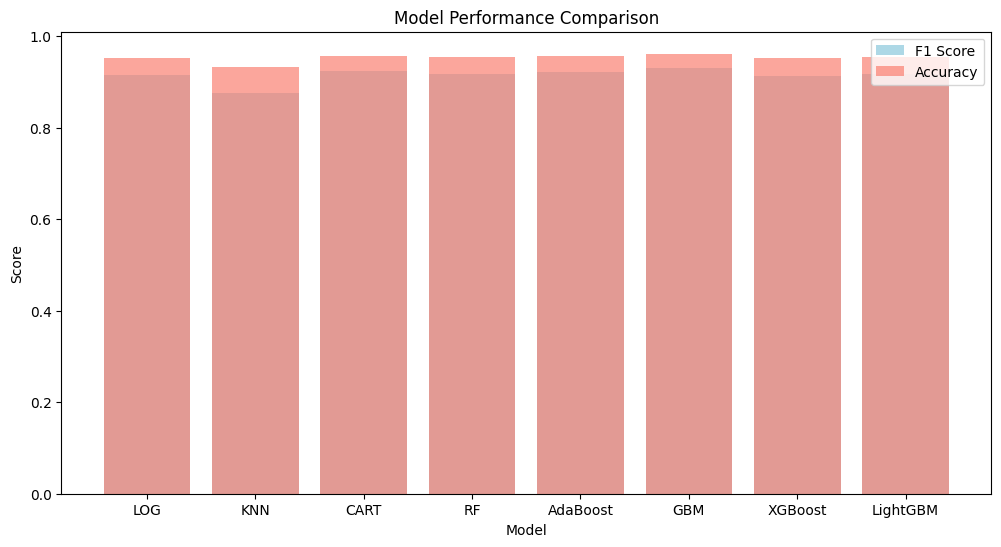

Best Model: GBM with F1 Score: 0.9307


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 하이퍼파라미터 그리드 설정
param_grids = {
    'LOG': {'C': [0.001, 0.01, 0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'CART': {'max_depth': [5, 10, 20, None]},
    'RF': {'n_estimators': [100, 200], 'max_depth': [10, 20, None]},
    'AdaBoost': {'n_estimators': [50, 100, 200]},
    'GBM': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]},
    'LightGBM': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200]}
}

# 결과를 저장할 리스트 생성
model_names = []
accuracies = []
f1_scores = []

# 모델별로 학습 및 성능 평가
for name, clf in models:
    print(f"Training {name}...")

    # GridSearchCV를 이용한 하이퍼파라미터 튜닝
    param_grid = param_grids.get(name, {})
    if param_grid:
        clf = GridSearchCV(clf, param_grid, cv=3, n_jobs=-1, scoring='f1')
    clf.fit(X_train, y_train)

    # 예측
    y_pred = clf.predict(X_test)

    # 성능 평가
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # 결과 저장
    model_names.append(name)
    accuracies.append(acc)
    f1_scores.append(f1)

    # 분류 리포트 출력
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # 혼동 행렬 시각화
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 모델 성능 시각화
plt.figure(figsize=(12, 6))
plt.bar(model_names, f1_scores, color='lightblue', label='F1 Score')
plt.bar(model_names, accuracies, alpha=0.7, color='salmon', label='Accuracy')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.show()

# 가장 성능이 좋은 모델 출력
best_model_index = np.argmax(f1_scores)
print(f"Best Model: {model_names[best_model_index]} with F1 Score: {f1_scores[best_model_index]:.4f}")


In [21]:
gbm = GradientBoostingClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2], 
    'n_estimators': [100, 200],
}

grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring='f1_macro',  # or another metric like 'accuracy', 'f1_macro'
    n_jobs=-1,
    cv=3,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200]},
             scoring='f1_macro', verbose=1)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1260
           1       0.96      0.90      0.93       498

    accuracy                           0.96      1758
   macro avg       0.96      0.94      0.95      1758
weighted avg       0.96      0.96      0.96      1758

Best Parameters:  {'learning_rate': 0.1, 'n_estimators': 100}


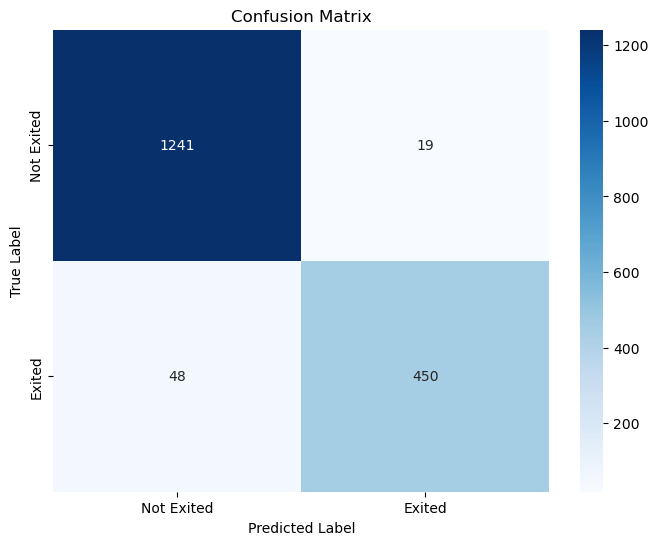

In [22]:

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Best Parameters: ", grid_search.best_params_)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Define the filename
filename = 'model_gbm.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

## 변경 사항
1. GridSearchCV를 통한 하이퍼 파라미터 튜닝을 통해 각 모델의 하이퍼파라미터를 자동으로 최적화하여 성능 극대화
2. F1 스코어 및 정확도 계산 -> 결과를 accuracies와 f1_scores 리스트에 저장
3. 혼동 행렬 시각화 -> 변경점은 거의 없음
4. 모델 성능 비교 그래프 시각화
5. 최고 성능 모델 출력

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1371, number of negative: 3903
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 5274, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.259954 -> initscore=-1.046205
[LightGBM] [Info] Start training from score -1.046205


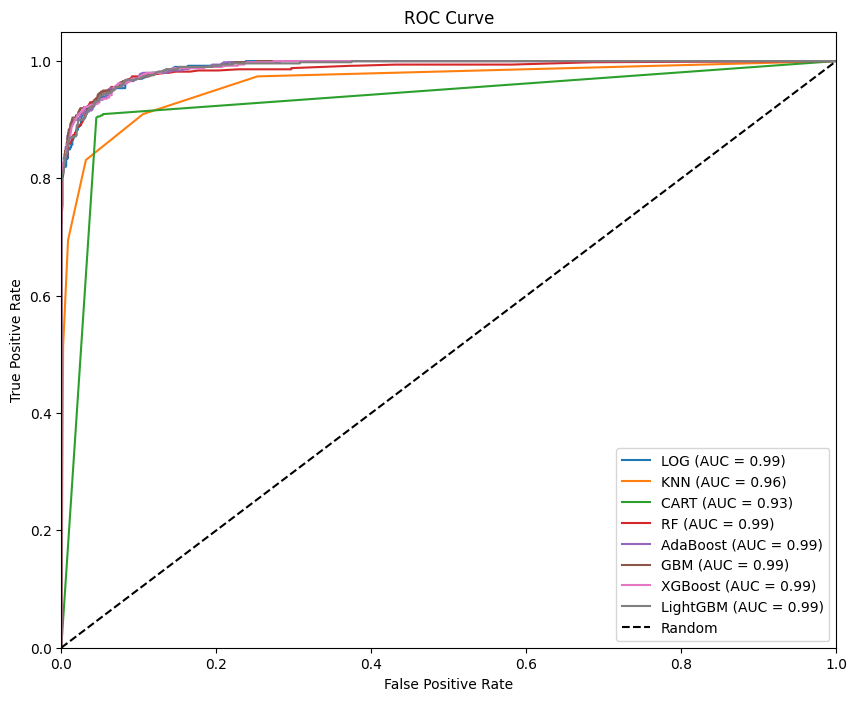

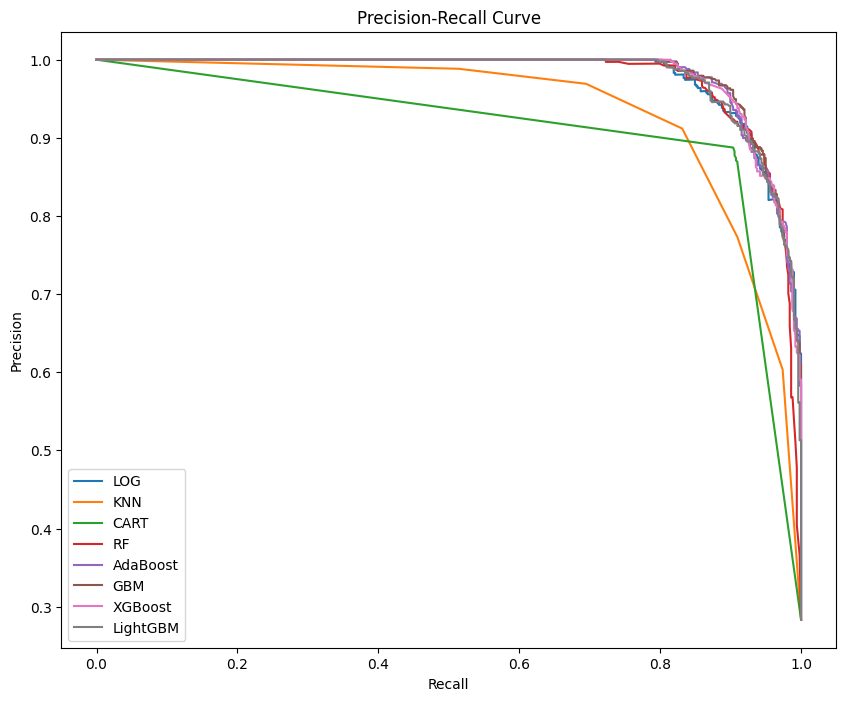

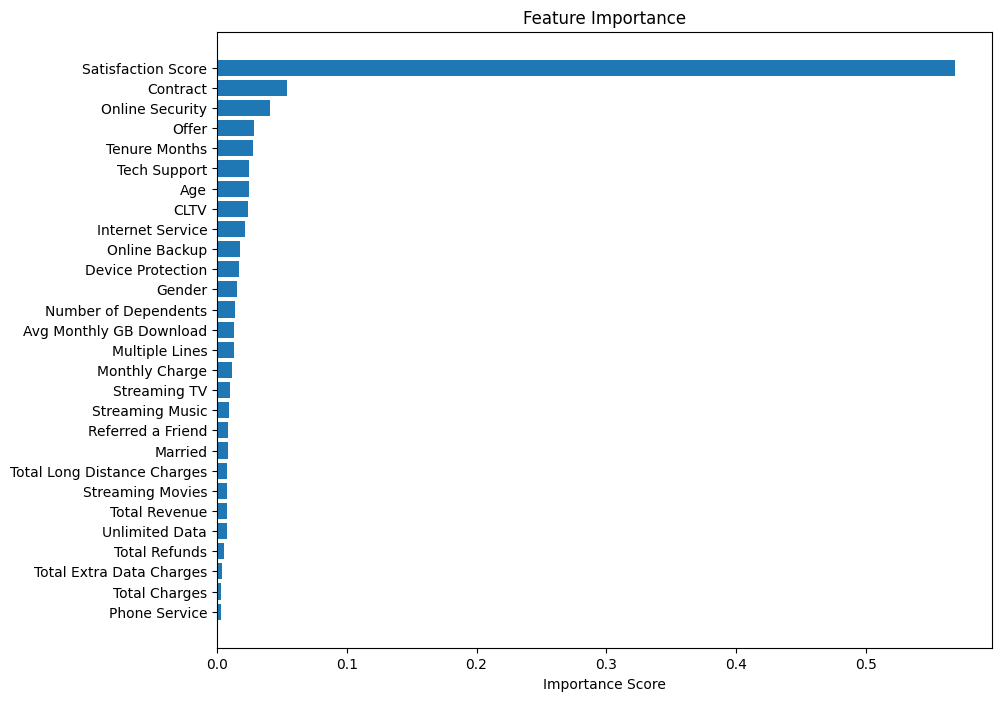

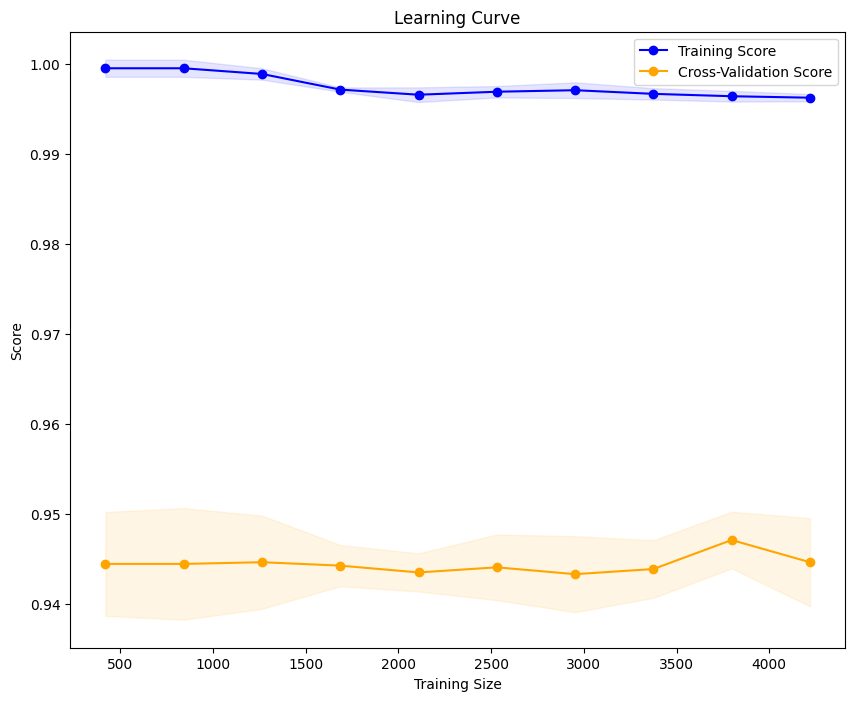

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1097, number of negative: 3122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 4219, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.260014 -> initscore=-1.045895
[LightGBM] [Info] Start training from score -1.045895
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1097, number of negative: 3122
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

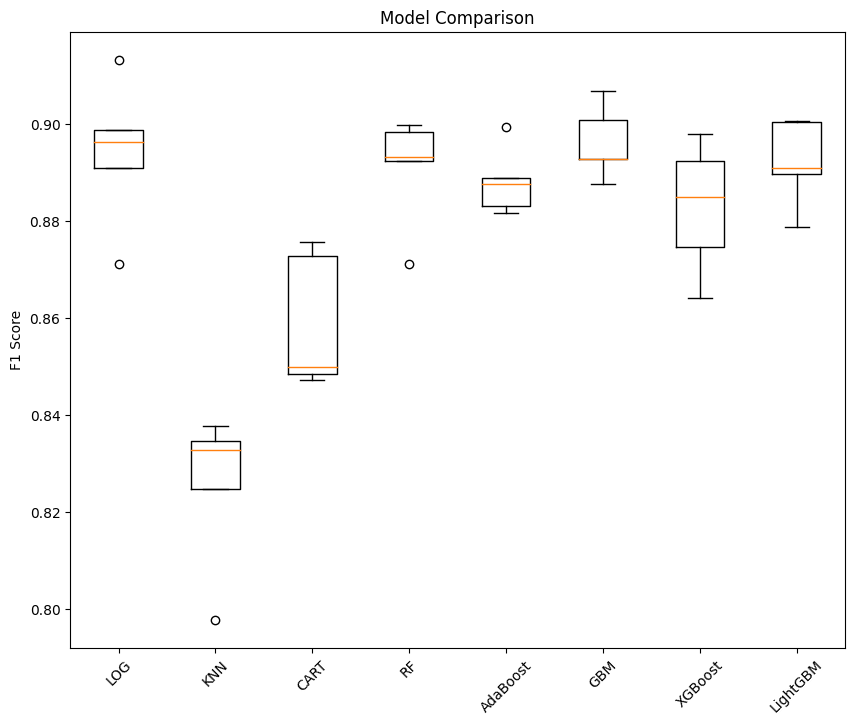

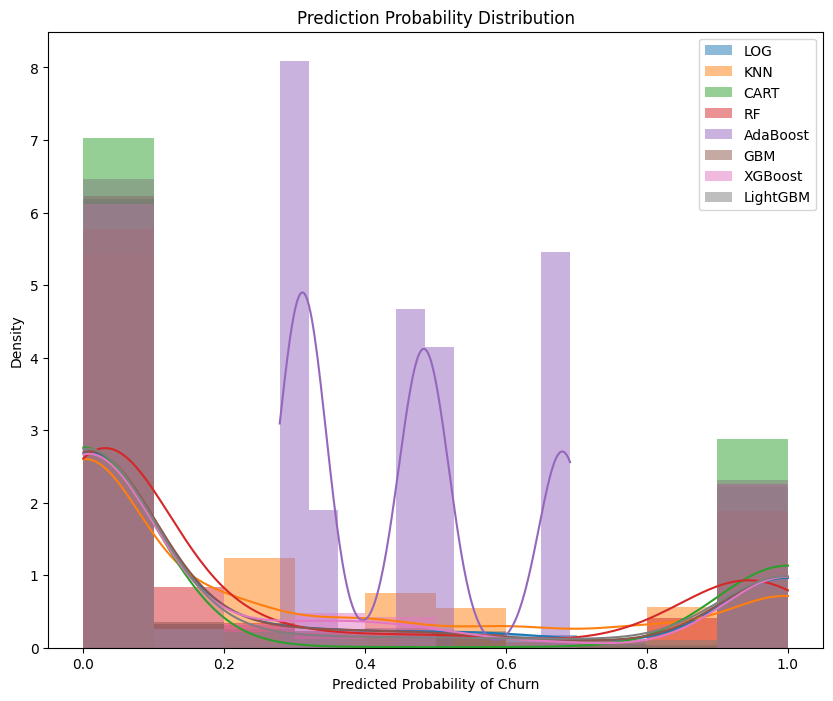

In [15]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import learning_curve, cross_val_score

# ROC 커브 시각화 함수
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, model in models:
        y_prob = model.predict_proba(X_test)[:, 1]  # 확률 예측
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)

        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall 커브 시각화 함수
def plot_precision_recall_curve(models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, model in models:
        y_prob = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_prob)

        plt.plot(recall, precision, label=name)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Feature Importance 시각화 함수
def plot_feature_importance(model, X_train):
    feature_importances = model.feature_importances_
    features = X_train.columns
    indices = np.argsort(feature_importances)

    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), feature_importances[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.show()

# Learning Curve 시각화 함수
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 8))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Cross-Validation Score')

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')

    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()

# 모델 성능 박스플롯 비교 함수
def plot_model_comparison_boxplot(models, X_train, y_train):
    results = []
    names = []

    for name, model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
        results.append(cv_results)
        names.append(name)

    plt.figure(figsize=(10, 8))
    plt.boxplot(results, labels=names)
    plt.title('Model Comparison')
    plt.ylabel('F1 Score')
    plt.xticks(rotation=45)
    plt.show()

# 예측 확률 분포 시각화 함수
def plot_prediction_probabilities(models, X_test):
    plt.figure(figsize=(10, 8))

    for name, model in models:
        y_prob = model.predict_proba(X_test)[:, 1]
        sns.histplot(y_prob, bins=10, kde=True, label=name, stat="density", linewidth=0)

    plt.title('Prediction Probability Distribution')
    plt.xlabel('Predicted Probability of Churn')
    plt.ylabel('Density')
    plt.legend(loc='best')
    plt.show()


# 모델 선정, 학습 및 평가 진행.
df = df2.copy()
X = df.drop(["Churn Value"], axis=1)
y = df["Churn Value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

models = [('LOG', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ("AdaBoost", AdaBoostClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBRFClassifier(objective='reg:squarederror')),
          ("LightGBM", LGBMClassifier())]

# 모델 훈련 및 ROC Curve 시각화
for name, clf in models:
    clf.fit(X_train, y_train)

plot_roc_curve(models, X_test, y_test)
plot_precision_recall_curve(models, X_test, y_test)

# Feature Importance: 트리 기반 모델 예시로 RandomForest 사용
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
plot_feature_importance(rf_model, X_train)

# 학습 곡선: RandomForest 예시
plot_learning_curve(RandomForestClassifier(), X_train, y_train)

# 모델 비교 박스플롯
plot_model_comparison_boxplot(models, X_train, y_train)

# 예측 확률 분포 시각화
plot_prediction_probabilities(models, X_test)


## 추가 내용
1. ROC Curve -> 각 모델의 ROC 커브와 AUC 값을 한 번에 비교 -> 시각적 확인 가능
2. Precision-Recall Curve -> 불균형 데이터셋에서 모델의 정밀도 & 재현률 시각적 분석
3. Feature Importance -> 랜덤 포레스트를 사용하여 중요 피처 시각화
4. Learning Curve -> 학습 크기에 따른 훈련과 검증 성능 시각적 비교 -> 과소적합 & 과대적합 확인
5. <odel Comparison Boxplot -> 여러 모델의 성능을 f1 score로 박스플롯으로 비교
6. Prediction Probability Distibution -> 각 모델의 예측 확률 분포를 시각화